In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/Kang/Desktop/金融科技Final Project/CSVs/回歸/total_merge_data.csv', index_col = 0, encoding = 'big5hkscs')
df = df.set_index(pd.DatetimeIndex(df.index))
title = df.columns.tolist()
title[2:]

['NT dollars',
 'MSCI world',
 'TWII',
 '貨幣總計數 M1B(百萬元)',
 '建築物開工樓地板面積(千平方公尺)',
 '合計買賣超',
 '外資買賣超',
 '融資(交易單位)',
 '融資金額(仟元)']

In [3]:
Coefficient = pd.read_csv('/Users/Kang/Desktop/金融科技Final Project/CSVs/回歸/Reg_Coefficient.csv', index_col = 0, encoding = 'big5hkscs')
Coefficient

,MSCI world,TWII,貨幣總計數 M1B(百萬元),建築物開工樓地板面積(千平方公尺),合計買賣超,外資買賣超,融資(交易單位),融資金額(仟元)
Beta_0,1.530000e+09,1.250000e+09,2.150000e+09,2.540000e+09,3.320000e+09,3.330000e+09,1.230000e+09,1.570000e+09
Beta_1,9.265644e+05,2.072959e+05,7.027177e+01,4.589217e+05,-3.344520e-02,-3.253200e-02,2.429755e+02,1.181010e+01


In [4]:
Predict = pd.DataFrame(index = df.index, columns = title[2:])

#把回歸結果套回去算出預估的定期定額金額
for i in Predict.index:
    Predict.loc[i, title[2:][0]] = df.loc[i, title[2:][0]]
    for j in range(len(title[2:]) - 1):
        Predict.loc[i, title[2:][j + 1]] = df.loc[i, title[2:][j + 1]] * Coefficient[title[2:][j + 1]].loc['Beta_1'] + Coefficient[title[2:][j + 1]].loc['Beta_0']

In [5]:
#看每期中哪種預估策略效果最好（距離最小），給予各種策略不同權重，最後用以組成帶有權重的預估值
strategy_w = {key:0 for key in title[3:]}

for i in range(len(Predict)):
    tem = title[3]
    tem_num = abs(Predict['NT dollars'].iloc[i] - Predict['MSCI world'].iloc[i])
    for j in title[3:]:
        if abs(Predict['NT dollars'].iloc[i] - Predict[j].iloc[i]) < tem_num:
            tem_num = abs(Predict['NT dollars'].iloc[i] - Predict[j].iloc[i])
            tem = j
    strategy_w[tem] += 1
    
total = sum(strategy_w.values())
strategy_w = {k: v / total for k, v in strategy_w.items()}

In [6]:
strategy_w

{'MSCI world': 0.08333333333333333,
 'TWII': 0.08333333333333333,
 '貨幣總計數 M1B(百萬元)': 0.16666666666666666,
 '建築物開工樓地板面積(千平方公尺)': 0.1388888888888889,
 '合計買賣超': 0.1388888888888889,
 '外資買賣超': 0.0,
 '融資(交易單位)': 0.05555555555555555,
 '融資金額(仟元)': 0.3333333333333333}

In [7]:
Predict['Min'] = Predict[title[3:]].min(axis=1)
Predict['Max'] = Predict[title[3:]].max(axis=1)
Predict['Weighted_Average'] = sum(Predict[title[3:][i]] * strategy_w[title[3:][i]] for i in range(len(title[3:])))

In [8]:
Predict.head()

,NT dollars,MSCI world,TWII,貨幣總計數 M1B(百萬元),建築物開工樓地板面積(千平方公尺),合計買賣超,外資買賣超,融資(交易單位),融資金額(仟元),Min,Max,Weighted_Average
2016-04-30,3339348556,3.07048e+09,3.02611e+09,3.23325e+09,3.18203e+09,3.31066e+09,3.30302e+09,3.38679e+09,3.20502e+09,3.026109e+09,3.386793e+09,3.20518e+09
2016-05-31,3320066240,3.06154e+09,2.95718e+09,3.23774e+09,3.20544e+09,3.41435e+09,3.44453e+09,3.31627e+09,3.13082e+09,2.957179e+09,3.444527e+09,3.18844e+09
2016-06-30,3220463290,3.06274e+09,3.03183e+09,3.2316e+09,3.23389e+09,3.22486e+09,3.20276e+09,3.3056e+09,3.10302e+09,3.031834e+09,3.305600e+09,3.16151e+09
2016-07-31,3204103712,3.09398e+09,3.09232e+09,3.23897e+09,3.11319e+09,3.05512e+09,3.05724e+09,3.30677e+09,3.11549e+09,3.055123e+09,3.306774e+09,3.13427e+09
2016-08-31,3270332585,3.12913e+09,3.1351e+09,3.25664e+09,3.10769e+09,3.24372e+09,3.22953e+09,3.33912e+09,3.15283e+09,3.107686e+09,3.339118e+09,3.18338e+09


In [9]:
Predict.tail()

,NT dollars,MSCI world,TWII,貨幣總計數 M1B(百萬元),建築物開工樓地板面積(千平方公尺),合計買賣超,外資買賣超,融資(交易單位),融資金額(仟元),Min,Max,Weighted_Average
2018-11-30,3240037933,3.40684e+09,3.28593e+09,3.37547e+09,3.52622e+09,3.31637e+09,3.31466e+09,2.9893e+09,3.04421e+09,2.989297e+09,3.526223e+09,3.25148e+09
2018-12-31,3109482688,3.30934e+09,3.27158e+09,3.38628e+09,3.44591e+09,3.45515e+09,3.4337e+09,3.03087e+09,3.08036e+09,3.030866e+09,3.455145e+09,3.26644e+09
2019-01-31,3047415147,3.34532e+09,3.27419e+09,3.40406e+09,3.45738e+09,3.22423e+09,3.27275e+09,2.97624e+09,3.03096e+09,2.976242e+09,3.457384e+09,3.22264e+09
2019-02-28,2751917598,3.43895e+09,3.3665e+09,3.42157e+09,3.14715e+09,3.12775e+09,3.16803e+09,2.92793e+09,2.99328e+09,2.927925e+09,3.438951e+09,3.16932e+09
2019-03-31,3246070415,3.47067e+09,3.41525e+09,3.42628e+09,3.44958e+09,3.3085e+09,3.32726e+09,2.98104e+09,3.05923e+09,2.981037e+09,3.470672e+09,3.26885e+09


In [10]:
from matplotlib.font_manager import FontProperties
font_noto_12 = FontProperties(fname = '/Library/Fonts/NotoSansCJKtc-Regular.otf', size = 14)
font_noto_18 = FontProperties(fname = '/Library/Fonts/NotoSansCJKtc-Regular.otf', size = 18)
from IPython.core.pylabtools import figsize
figsize(15, 9)

In [11]:
from matplotlib.ticker import FuncFormatter
#用來為y軸加上單位縮寫的函式
def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["B", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
                    #print (val, signf)
                    if str(val).split(".")[1] == "0":
                        return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

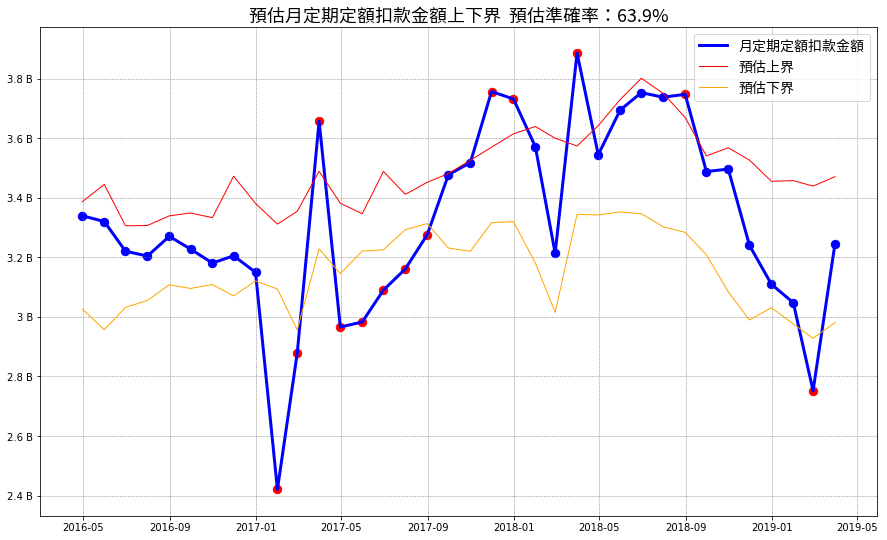

In [17]:
good_count = 0
bad_count = 0
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.plot(Predict['NT dollars'], linewidth=3, color = 'blue')
plt.plot(Predict['Max'], linewidth=1, color = 'red')
plt.plot(Predict['Min'], linewidth=1, color = 'orange')
for i in range(len(Predict)):
    if (Predict['NT dollars'].iloc[i] >= Predict['Min'].iloc[i]) & (Predict['NT dollars'].iloc[i] <= Predict['Max'].iloc[i]):
        plt.scatter(Predict.index[i], Predict['NT dollars'].iloc[i], color = 'blue', s = 70)
        good_count += 1
    else:
        plt.scatter(Predict.index[i], Predict['NT dollars'].iloc[i], color = 'red', s = 70)
        bad_count += 1

predit_rate = str(round((good_count / (good_count + bad_count)) * 100, 1))
plt.title('預估月定期定額扣款金額上下界  預估準確率：' + predit_rate + '%', fontproperties = font_noto_18)
plt.legend(['月定期定額扣款金額', '預估上界', '預估下界'], loc = 'best', prop = font_noto_12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

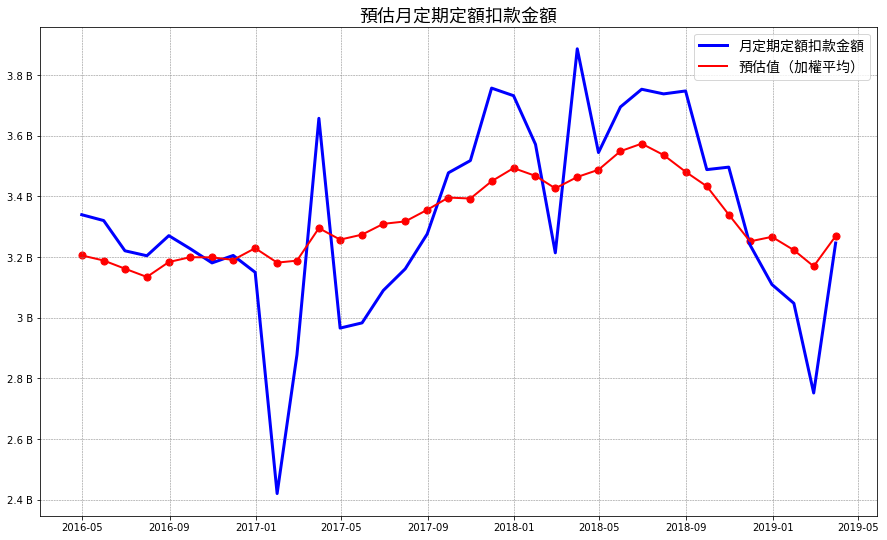

In [15]:
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.plot(Predict['NT dollars'], linewidth=3, color = 'blue')
plt.plot(Predict['Weighted_Average'], linewidth=2, color = 'red')
for i in range(len(Predict)):
    plt.scatter(Predict.index[i], Predict['Weighted_Average'].iloc[i], color = 'red', s = 50)

plt.title('預估月定期定額扣款金額', fontproperties = font_noto_18)
plt.legend(['月定期定額扣款金額', '預估值（加權平均）'], loc = 'best', prop = font_noto_12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)